**Training YOLOv8 on the DMS (Driver Monitoring System) Dataset**

In this notebook, we utilize the YOLOv8 model, training it on a custom dataset called DMS (Driver Monitoring System). This dataset comprises images categorized into the following classes:
* Open Eye
* Closed Eye
* Cigarette
* Phone
* Seatbelt


---


**Training Summary**

* The best results were achieved at epoch 174.
* Total Epochs: 274 epochs completed in 5.874 hours.


---
**Validation Results**
Overall Class Performance:
* Precision: 0.894
* Recall: 0.872
* mAP50: 0.921
* mAP50-95: 0.676

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.39 🚀 Python-3.12.4 torch-2.3.1 CPU (Apple M1)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 187.0/228.3 GB disk)


In [2]:
%pip install -U ray[tune]

zsh:1: no matches found: ray[tune]
Note: you may need to restart the kernel to use updated packages.


In [5]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
model.train(data="/Users/christhaliyath/MAC/MTECH/dataset/archive/data.yaml", epochs=500, patience=100)  # train the model

Ultralytics YOLOv8.2.39 🚀 Python-3.12.4 torch-2.3.1 CPU (Apple M1)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=../../dataset/archives/data.yaml, epochs=500, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

RuntimeError: Dataset '../../dataset/archives/data.yaml' error ❌ '../../dataset/archives/data.yaml' does not exist

In [ ]:
# # Run the following in case of trainig interruption or running out of GPU time. 
# from ultralytics import YOLO

# # Load a model
# model = YOLO('/kaggle/working/runs/detect/train##/weights/last.pt')  # load a partially trained model

# # Resume training
# results = model.train(resume=True)

In [ ]:
# Download final results
import shutil

directory_to_zip = '/kaggle/working/runs/detect/train##/'

zip_filename = 'DMS - V2'

# Create the ZIP archive
shutil.make_archive(zip_filename, 'zip', directory_to_zip)

# Download /kaggle/working/DMS - V2.zip

'/kaggle/working/DMS - V2.zip'

In [ ]:
model.export(format='tflite')

**Test the model**


0: 384x640 1 Open Eye, 1 Seatbelt, 6.7ms
Speed: 1.0ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


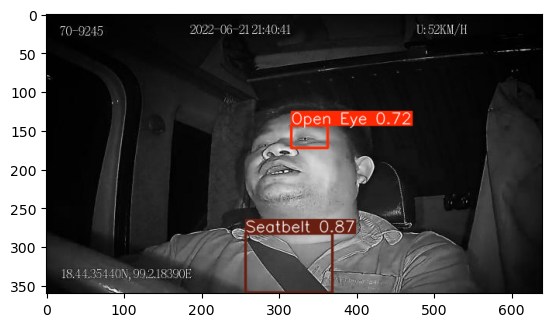

tensor([[257.3434, 283.3158, 369.1151, 359.9106,   0.8688,   4.0000],
        [316.4296, 144.7489, 363.0070, 173.7230,   0.7198,   0.0000]], device='cuda:0')


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening '/tmp/tmplzv2eoaa.PNG'


In [ ]:
from ultralytics import YOLO
import cv2
from PIL import Image
from matplotlib import pyplot as plt

# Load Custom YOLOv8 Model
DMS_V2_MODEL_PATH = '/kaggle/working/runs/detect/train39/weights/best.pt'
model = YOLO(DMS_V2_MODEL_PATH)

img_file_name = '/kaggle/input/dms-driver-monitoring-system/train/images/-1070-_mp4-100_jpg.rf.6af54c65864ea54981f946d603bbdf00.jpg'

# Load the input image
img = cv2.imread(f'{img_file_name}')

# Run inference on an image
results = model(img)  # results list

# Visualize the results on the frame
annotated_frame = results[0].plot()

#Show the image with matplotlib
plt.imshow(annotated_frame)
plt.show()

# View results
for r in results:
    print(r.boxes.data)  # print the Boxes object containing the detection bounding boxes

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save(f'{IMAGES_RESULTS_PATH}/results - {img_file_name}')  # save image